Dataset Split:
    小的数据集：8/2；7/2/1
    大的数据集：1/1即可

K-fold Cross Validation

方差/偏差

比较高的方差，可能是过拟合/泛化能力较差
如果高的偏差，可能是模型太简单/训练轮次太少

正则化：
目的：解决high variance的问题，减少over-fitting
L1正则化/L2正则化，把模型的参数的绝对值（or平方）加入到损失函数里，这样优化的时候就也会尝试减少参数
Differentiate，发现更新后的w会有一个小于一的比值：(1-a*lambda/m)

梯度消失和梯度爆炸
因为网络机构本身而指数级增大或缩小
权重初始化：
z=w1x1+w2x2+...+wnxn
n越大，为了平衡等式，w就越小

He初始化： w(l) = np.random.rand(shape)*np.sqrt(2/n(l-1))

优化算法 Optimization 
1.Batch GD：全部都Gradient Descent，非常的消耗内存
2.Mini GD：只Gradient Descent一小部分（但难以充分利用多核结构）
3.Random GD：随机

Momentum 动量梯度下降法：每一个batch中计算自己的gradient，整合已有的梯度，integrate成更加靠谱的？
RMSProp：在错误的路上慢走两步，看梯度的变化趋势
Adam：前两者结合

常识：学习率不要太大，不然会不converge
学习率有一些衰减方法：
1.分段常数衰减
2.指数衰减
3.自然常数衰减
4.余弦衰减

批标准化：Batch Normalization
期望归一化/方差/能否标准化每一层的输出？

CNN：
Same Pedding：先填充一层，这样子的话kernel过了一遍之后输出输入dimension相同
Classicis of CNN: 
LeNet-5; AlexNet; VGG 
ResNet!!! 每一层的输出都包含了输入


System for AI: Lecture Introudction 底层大强课「实训」

#微软亚洲研究院系统组与人工智能教育团队/
开源开放的计算机系统教学：
在线学习+开源社区
#教学方式：教师指导，自主学习，积极互动，重视反馈
#经典实例：人工智能系统与工具/深度学习平台
#海量资源：课程资料、实验代码、开源系统
#真是工业产品和技术；快速迭代更新；开放的计算机系统学习与科研社区；
「把手弄脏」「该去学什么」

课程设计背景：
问题--深度学习算法早已奠定，为什么近十年采取得巨大成功？
海量数据、算法进步、语言/框架、计算能力
做系统方向的人已经很少啦，we need this www (e!)算法+系统的综合性人才
NLP：Precian的model，在学校不好做了，在超大公司才可以train。

！！GitHub上有更新

底层设计～

从人工智能系统的概述到深度神经网络计算框架基础；从矩阵运算到计算机体系结构；分布式训练算法；Scheduling & Resource Management System（复杂的优化问题）；Inference System 

自动化机器学习：机器自行调节超参数lol

AI for systems lol

本质上：输入输出都是向量，but，可以根据OpenCV/NLP等可视化出来，比如说话 or 画画 lol  

更广泛的AI系统生态：机器学习新模式RL etc

小结！
深度学习lai yuan yi





# 实战！

In [22]:
#import all that need 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()#load data

In [8]:
train_images.shape #let's take a look 

(60000, 28, 28)

In [9]:
type(train_images)

numpy.ndarray

In [10]:
train_labels.shape

(60000,)

In [11]:
label = ['T-shirt/top','Trouser','Pullover','Dress','Coat','andal','Shirt','Sneaker','Bag','Ankle boot']

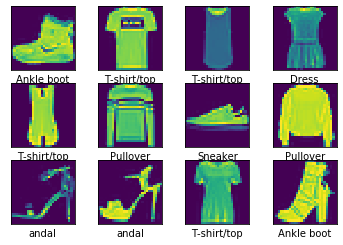

In [13]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(train_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label[train_labels[i]]) #take a look at the first 12

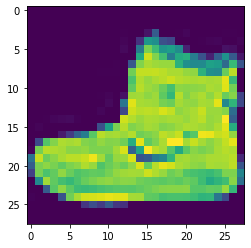

In [14]:
plt.imshow(train_images[0]) #take a further look at the first one

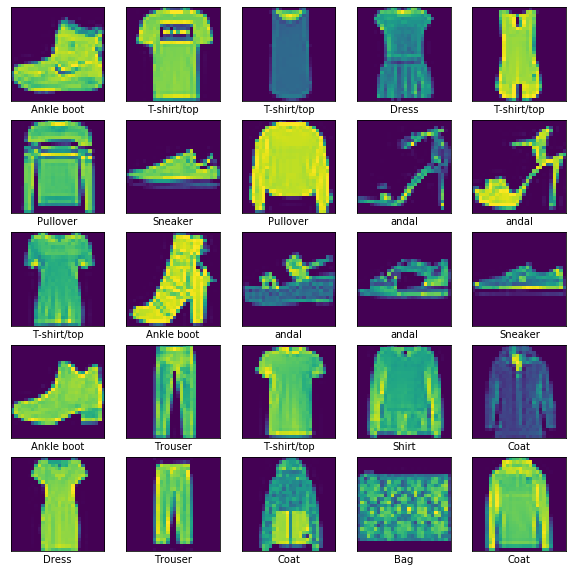

In [18]:
#look at more?
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(label[train_labels[i]])
plt.show()

#i found that we need to output label[train_labels[i]] in the end, rather than train_labels[i], becoz the latter is just numbers lol

In [36]:
def define_nn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(64,activation='relu'), 
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(10)
    ])
    return model

In [37]:
#Compile our model 
?model.compile()
model= define_nn_model()
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])#we could change metrics later 
model.summary()

Object `model.compile()` not found.
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [38]:
#Train our model 
history = model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=20,batch_size=64)

Epoch 1/20
938/938 [==============================] - 1s 1ms/step - loss: 10.7209 - accuracy: 0.4888 - val_loss: 1.0439 - val_accuracy: 0.6503
Epoch 2/20
938/938 [==============================] - 1s 973us/step - loss: 1.0647 - accuracy: 0.6287 - val_loss: 0.8575 - val_accuracy: 0.6911
Epoch 3/20
938/938 [==============================] - 1s 964us/step - loss: 0.9256 - accuracy: 0.6549 - val_loss: 0.8002 - val_accuracy: 0.7041
Epoch 4/20
938/938 [==============================] - 1s 1ms/step - loss: 0.8527 - accuracy: 0.6699 - val_loss: 0.8480 - val_accuracy: 0.6893
Epoch 5/20
938/938 [==============================] - 1s 1ms/step - loss: 0.8033 - accuracy: 0.6907 - val_loss: 0.7211 - val_accuracy: 0.7398
Epoch 6/20
938/938 [==============================] - 1s 951us/step - loss: 0.7481 - accuracy: 0.7073 - val_loss: 0.7019 - val_accuracy: 0.7428
Epoch 7/20
938/938 [==============================] - 1s 984us/step - loss: 0.7276 - accuracy: 0.7120 - val_loss: 0.7056 - val_accuracy: 0.73

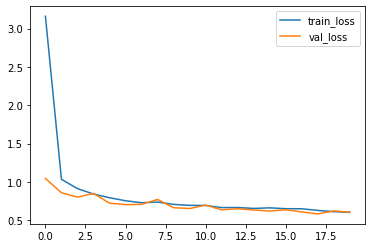

In [42]:
fig,ax=plt.subplots()
ax.plot(history.history['loss'], label='train_loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.set_title = 'Loss of the model'
ax.set_xlabel = 'Time (Epochs)'
ax.set_ylabel = 'Loss'
ax.legend()

In [43]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 826us/step - loss: 0.6034 - accuracy: 0.8181

Test accuracy: 0.8180999755859375


In [44]:
#make it a probability thing!
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [45]:
predictions = probability_model.predict(test_images)
predictions[0]

array([6.6343791e-29, 1.3432756e-24, 0.0000000e+00, 1.8183447e-37,
       0.0000000e+00, 2.3227518e-02, 0.0000000e+00, 3.1273454e-02,
       3.7760009e-16, 9.4549900e-01], dtype=float32)

predict label:
Ankle boot


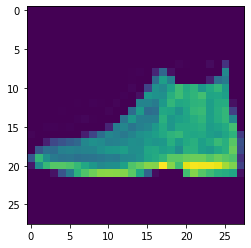

In [52]:
#which one is really the one?
plt.imshow(test_images[0])
print("predict label:")
print(label[np.argmax(predictions[0])])

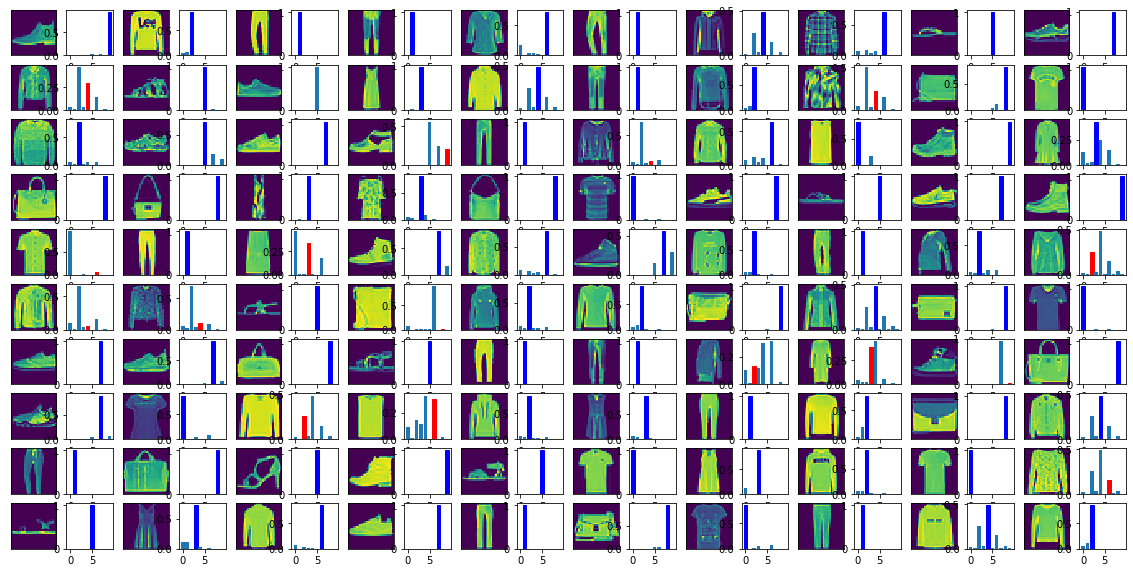

In [53]:
plt.figure(figsize=(20,20))
hit = 0
l = 10
for i in range(l*l):
    plt.subplot(2*l,2*l,2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    plt.grid(False)
    plt.subplot(2*l,2*l,2*i+2)
    predict_test_bar =plt.bar(range(10),predictions[i])
    if np.argmax(predictions[i]) == test_labels[i]:
        predict_test_bar[test_labels[i]].set_color('blue')
        hit += 1
    else:
        predict_test_bar[test_labels[i]].set_color('red')
#BLUE ONES ARE THE CORRECT ONES; RED ONES ARE THE ONES THAT SHOULD BE SPOTTED

In [98]:
#NOW LET'S TRY CNN! 
def define_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=5,kernel_size = (4,4),activation='relu',input_shape=(28,28,1)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        #tf.keras.layers.Dropout(0.1),
        #tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(10)
    ])
    return model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [99]:
cnn_model = define_cnn_model()
cnn_model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 25, 25, 5)         85        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 720)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               92288     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1290      
Total params: 93,663
Trainable params: 93,663
Non-trainable params: 0
_________________________________________________________________


In [100]:
train_images2=train_images.reshape(60000,28,28,1)
test_images2=test_images.reshape(10000,28,28,1)
print(train_images2.shape)
print(train_labels.shape)
print(test_images2.shape)
print(test_labels.shape)

history2=cnn_model.fit(train_images2,train_labels,epochs=15,validation_data=(test_images2,test_labels),batch_size=128)


(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)
Epoch 1/15
469/469 [==============================] - 6s 13ms/step - loss: 12.8751 - accuracy: 0.6836 - val_loss: 1.0714 - val_accuracy: 0.8082
Epoch 2/15
469/469 [==============================] - 6s 13ms/step - loss: 0.7979 - accuracy: 0.8281 - val_loss: 0.6050 - val_accuracy: 0.8282
Epoch 3/15
469/469 [==============================] - 6s 13ms/step - loss: 0.4733 - accuracy: 0.8534 - val_loss: 0.5072 - val_accuracy: 0.8442
Epoch 4/15
469/469 [==============================] - 6s 14ms/step - loss: 0.3632 - accuracy: 0.8741 - val_loss: 0.4604 - val_accuracy: 0.8556
Epoch 5/15
469/469 [==============================] - 6s 13ms/step - loss: 0.3085 - accuracy: 0.8892 - val_loss: 0.4568 - val_accuracy: 0.8555
Epoch 6/15
469/469 [==============================] - 6s 14ms/step - loss: 0.2677 - accuracy: 0.9010 - val_loss: 0.4221 - val_accuracy: 0.8648
Epoch 7/15
469/469 [==============================] - 11s 24ms/step - loss: 0.2388 - 

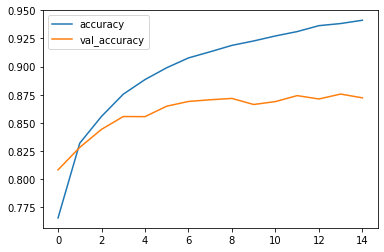

In [101]:
fig,ax=plt.subplots()
ax.plot(history2.history['accuracy'], label='accuracy')
ax.plot(history2.history['val_accuracy'], label='val_accuracy')
ax.set_title = 'Accuracy of the model'
ax.set_xlabel = 'Time (Epochs)'
ax.set_ylabel = 'Accuracy'
ax.legend()

In [ ]:
#adam/accuracy, different var, different response 